<a href="https://colab.research.google.com/github/Aromer9/NTC_Project/blob/main/Detalle_NTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto NTC

#1. Reading Data

In [1]:
import pandas as pd

In [2]:
url_data= {
  "enero": 'https://drive.google.com/file/d/1SJ0kih8e3Oy9J1I478m1dNJCK9yayxac/view?usp=share_link',
  "febrero":'https://drive.google.com/file/d/1gwrqO0ZZJyAs3Q99zKYtl0KDMZhOtgvv/view?usp=share_link',
  "marzo":'https://drive.google.com/file/d/1kU0celF2FUqsn0HI2sg6RUelPwCslTp9/view?usp=share_link'

}

In [3]:
# get all files
for url in url_data.values():
  id = url.split("/")[5]
  !gdown $id

Downloading...
From: https://drive.google.com/uc?id=1SJ0kih8e3Oy9J1I478m1dNJCK9yayxac
To: /content/csv_enero_23_det.csv
100% 15.3M/15.3M [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gwrqO0ZZJyAs3Q99zKYtl0KDMZhOtgvv
To: /content/csv_febrero_23_det.csv
100% 15.2M/15.2M [00:01<00:00, 14.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kU0celF2FUqsn0HI2sg6RUelPwCslTp9
To: /content/csv_marzo_23_det.csv
100% 18.2M/18.2M [00:00<00:00, 37.1MB/s]


In [4]:
df = pd.read_csv("csv_enero_23_det.csv")
df2 = pd.read_csv("csv_febrero_23_det.csv")
df3 = pd.read_csv("csv_marzo_23_det.csv")

In [5]:
df = df.append(df2)

<ipython-input-5-fb89c00654ab>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [6]:
df = df.append(df3)

<ipython-input-6-3ecbe746564b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)


#2. Data Understanding

In [7]:
df.head()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
0,2023-01-02,55,14,1442,4,POS,819 LIDER,MACUL,24.00,42891,55230102004016942,86.0,36.0,11.0
1,2023-01-04,229,11,1130,3,POS,200 EXPRESS 400,MACUL,27.98,29796,229230104003004930,64.0,30.0,15.0
2,2023-01-04,498,17,1758,1,POS,200 EXPRESS 400,MACUL,24.00,15688,498230104001021658,56.0,25.0,19.0
3,2023-01-02,55,18,1825,3,POS,819 LIDER,MACUL,1.00,2092,55230102003017625,1.0,30.0,11.0
4,2023-01-04,229,13,1350,4,POS,200 EXPRESS 400,MACUL,2.00,2269,229230104004002550,4.0,20.0,15.0


Estadistica básica del dataset

In [8]:
df.describe()

,store_nbr,hour_nbr,trxhora,terminal,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
count,519644.000000,519644.000000,519644.000000,519644.000000,519644.000000,519644.000000,5.196440e+05,519644.000000,519644.000000,519644.000000
mean,132.814219,15.222716,1551.765547,28.883386,14.346919,20567.210912,1.330444e+17,48.990117,34.593994,18.802568
std,147.461744,3.559250,354.972722,35.645776,20.177636,28415.370411,1.474617e+17,49.811598,12.275733,10.159697
min,55.000000,6.000000,639.000000,1.000000,0.020000,1.000000,5.523010e+16,1.000000,0.000000,0.000000
25%,55.000000,12.000000,1246.000000,3.000000,3.000000,4697.000000,5.523020e+16,13.000000,26.000000,10.000000
50%,55.000000,15.000000,1545.000000,12.000000,7.000000,10832.000000,5.523031e+16,31.000000,35.000000,18.000000
75%,229.000000,18.000000,1858.000000,85.000000,17.000000,24451.000000,2.292301e+17,66.000000,45.000000,28.000000
max,498.000000,22.000000,2224.000000,94.000000,672.000000,662881.000000,4.982303e+17,215.400000,56.000000,41.000000


Columnas del dataset

In [9]:
list(df.columns)

['trx_date',
 'store_nbr',
 'hour_nbr',
 'trxhora',
 'terminal',
 'terminal_type',
 'formato',
 'comuna',
 'sales_unit_qty',
 'sales_retail_amt',
 'trx_id',
 'scan_time',
 'tender_time',
 'inactive_time']

Dimensiones del Dataset

In [10]:
df.shape

(519644, 14)

Detección NaN values

In [11]:
df_n = df.copy()

In [12]:
df_na = df[df.isna().any(axis=1)]

In [13]:
df_na.head()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time


In [14]:
#df_na.shape

Análisis de la agregación de los datos:

In [15]:
#df_55 = df[(df["trx_date"] == '2023-01-29') & (df["store_nbr"] == 55) & (df["hour_nbr"] == 19) & (df["terminal_type"] == 'POS')] #& (df["terminal"] == 12)
df_55 = df[(df["store_nbr"] == 229)]
#filter = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-15', '2023-01-14', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17'])
#df_55 = df_55[filter]

df_55 = df_55.sort_values(['trx_date', 'terminal','trxhora'])
df_55.head(50)



#El orden de las variables importa (Sort) ya que permite calcular métricas en función de hora y terminal

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,229230102001000439,1.0,30.0,6.0
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,229230102001000540,30.0,36.0,15.0
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,229230102001000641,10.0,19.0,11.0
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,229230102001000742,5.0,22.0,13.0
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,229230102001000843,61.0,36.0,11.0
2827,2023-01-02,229,11,1144,1,POS,200 EXPRESS 400,MACUL,6.00,8344,229230102001000944,18.0,26.0,6.0
2812,2023-01-02,229,11,1145,1,POS,200 EXPRESS 400,MACUL,7.00,9018,229230102001001045,13.0,20.0,6.0
3697,2023-01-02,229,11,1146,1,POS,200 EXPRESS 400,MACUL,6.00,7813,229230102001001146,18.0,23.0,8.0
3730,2023-01-02,229,12,1218,1,POS,200 EXPRESS 400,MACUL,5.00,5445,229230102001001418,8.0,22.0,8.0
5683,2023-01-02,229,12,1219,1,POS,200 EXPRESS 400,MACUL,8.00,9033,229230102001001519,18.0,33.0,15.0


**Creación de nuevas dimensiones**

In [16]:
df_55.shape

(74070, 14)

In [17]:
df_55['time_total'] = df_55['scan_time'] + df_55['tender_time'] + df_55['inactive_time']
df_55['min_diff'] = df_55['time_total'] / 60
df_55['tipo_carro'] = 1


**Se crea nuevo atributo "Tipo Carro" en función de data**

In [18]:
import pandas as pd
import numpy as np

def condition(A):
    if A <= 8:
      return '00-express'
    elif A > 8 < 20:
      return '01-chico'
    elif A > 20 < 38:
      return '02-mediano'
    elif A > 38 < 68:
      return '03-grande'
    elif A >= 68.0:
      return '04-muygrande'

df_55['tipo_carro'] = df_55['sales_unit_qty'].apply(condition)
df_55


,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,229230102001000439,1.0,30.0,6.0,37.0,0.616667,00-express
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,229230102001000540,30.0,36.0,15.0,81.0,1.350000,01-chico
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,229230102001000641,10.0,19.0,11.0,40.0,0.666667,00-express
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,229230102001000742,5.0,22.0,13.0,40.0,0.666667,00-express
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,229230102001000843,61.0,36.0,11.0,108.0,1.800000,00-express
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74414,2023-03-31,229,19,1958,3,POS,200 EXPRESS 400,MACUL,46.39,64260,229230331003030358,58.0,38.5,16.0,112.5,1.875000,01-chico
75040,2023-03-31,229,20,2002,3,POS,200 EXPRESS 400,MACUL,2.00,2100,229230331003030402,4.0,18.0,16.0,38.0,0.633333,00-express
75642,2023-03-31,229,20,2003,3,POS,200 EXPRESS 400,MACUL,2.00,3983,229230331003030503,14.0,33.0,16.0,63.0,1.050000,00-express
74866,2023-03-31,229,20,2004,3,POS,200 EXPRESS 400,MACUL,4.00,3361,229230331003030604,13.0,35.0,4.0,52.0,0.866667,00-express


In [19]:
df_55 = df_55.sort_values(['trx_date', 'terminal','trxhora'])

**Se crea atributo "jeg_caja" con la información de cuantas cajeras hay por hora**

In [20]:
lista=[]
term=1
for i in range(len(df_55)):
      horaaux=''
      terminalaux=''
      if i == 0:
        hora = df_55.iloc[i]['hour_nbr']
        terminal = df_55.iloc[i]['terminal']
        fec = df_55.iloc[i]['trx_date']
        term==term
      else:
        horaaux=hora
        terminalaux=terminal
        fecaux=fec
        hora = df_55.iloc[i]['hour_nbr']
        terminal = df_55.iloc[i]['terminal']
        fec = df_55.iloc[i]['trx_date']

        if fec == fecaux:
          if hora == horaaux:

            if terminal == terminalaux:
              term==term
              term=0
            elif terminal != terminalaux:
              term=1
          else:
            term=1
        if fec != fecaux:
          term=1

      lista.append(term)

df_55['jeg_caja'] = lista


In [21]:
df_55.head(60)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,jeg_caja
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,229230102001000439,1.0,30.0,6.0,37.0,0.616667,00-express,1
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,229230102001000540,30.0,36.0,15.0,81.0,1.350000,01-chico,0
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,229230102001000641,10.0,19.0,11.0,40.0,0.666667,00-express,0
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,229230102001000742,5.0,22.0,13.0,40.0,0.666667,00-express,0
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,229230102001000843,61.0,36.0,11.0,108.0,1.800000,00-express,0
2827,2023-01-02,229,11,1144,1,POS,200 EXPRESS 400,MACUL,6.00,8344,229230102001000944,18.0,26.0,6.0,50.0,0.833333,00-express,0
2812,2023-01-02,229,11,1145,1,POS,200 EXPRESS 400,MACUL,7.00,9018,229230102001001045,13.0,20.0,6.0,39.0,0.650000,00-express,0
3697,2023-01-02,229,11,1146,1,POS,200 EXPRESS 400,MACUL,6.00,7813,229230102001001146,18.0,23.0,8.0,49.0,0.816667,00-express,0
3730,2023-01-02,229,12,1218,1,POS,200 EXPRESS 400,MACUL,5.00,5445,229230102001001418,8.0,22.0,8.0,38.0,0.633333,00-express,1
5683,2023-01-02,229,12,1219,1,POS,200 EXPRESS 400,MACUL,8.00,9033,229230102001001519,18.0,33.0,15.0,66.0,1.100000,00-express,0


**Se crea atributo "dayweek" con la descripción del día de la semana**

In [22]:
from datetime import date
from datetime import datetime
import datetime
import calendar

lista=[]
for i in range(len(df_55)):
    fecha = df_55.iloc[i]['trx_date']
    fecha = pd.to_datetime(fecha)
    fecha_dt = calendar.day_name[fecha.weekday()]

    lista.append(fecha_dt)

df_55['day_week'] = lista

In [23]:
df_55.tail()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,jeg_caja,day_week
74414,2023-03-31,229,19,1958,3,POS,200 EXPRESS 400,MACUL,46.39,64260,229230331003030358,58.0,38.5,16.0,112.5,1.875000,01-chico,0,Friday
75040,2023-03-31,229,20,2002,3,POS,200 EXPRESS 400,MACUL,2.00,2100,229230331003030402,4.0,18.0,16.0,38.0,0.633333,00-express,1,Friday
75642,2023-03-31,229,20,2003,3,POS,200 EXPRESS 400,MACUL,2.00,3983,229230331003030503,14.0,33.0,16.0,63.0,1.050000,00-express,0,Friday
74866,2023-03-31,229,20,2004,3,POS,200 EXPRESS 400,MACUL,4.00,3361,229230331003030604,13.0,35.0,4.0,52.0,0.866667,00-express,0,Friday
75920,2023-03-31,229,20,2005,3,POS,200 EXPRESS 400,MACUL,6.00,5924,229230331003030705,58.0,12.0,8.0,78.0,1.300000,00-express,0,Friday


In [24]:
df_55.to_csv('data_df_229_1_2_.csv') #Extracción de paso 1, y 2 de la consulta

#3. Visualitations

**Distribución de transacciones por dia de la semana**

In [25]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt

<ipython-input-26-77ee24695e01>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'Distribución de transacciones por fecha local 55')

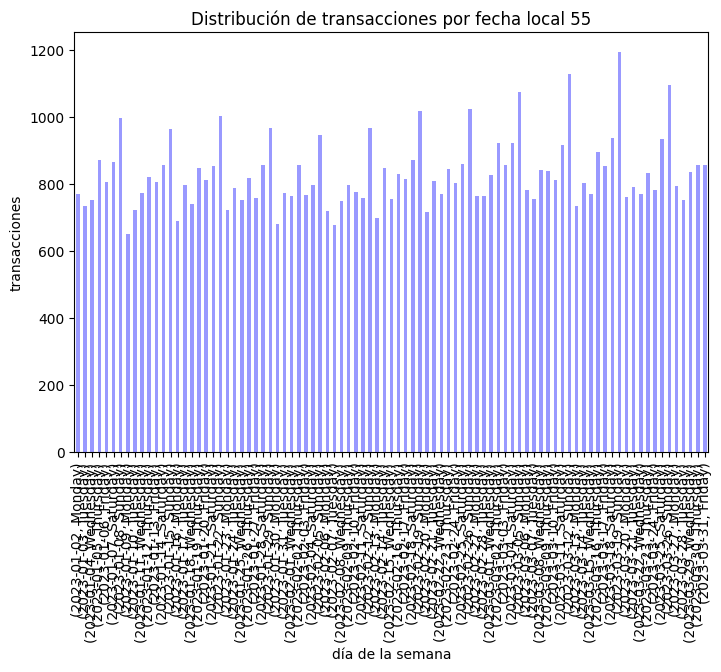

In [26]:
df_55_trx = df_55.groupby(['trx_date', 'day_week']).count()['trx_id']

fig, axs = plt.subplots(1, 1, figsize=(18, 12))
#ax.set_title('Distribución de transacciones por hora')

#Plot 1
plt.subplot(2,2,1)
df_55_trx.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='día de la semana')
plt.title('Distribución de transacciones por fecha local 55')

**Distribución de transacciones por hora**

<ipython-input-27-48c0f643c1b7>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'Distribución de transacciones por fecha local 55')

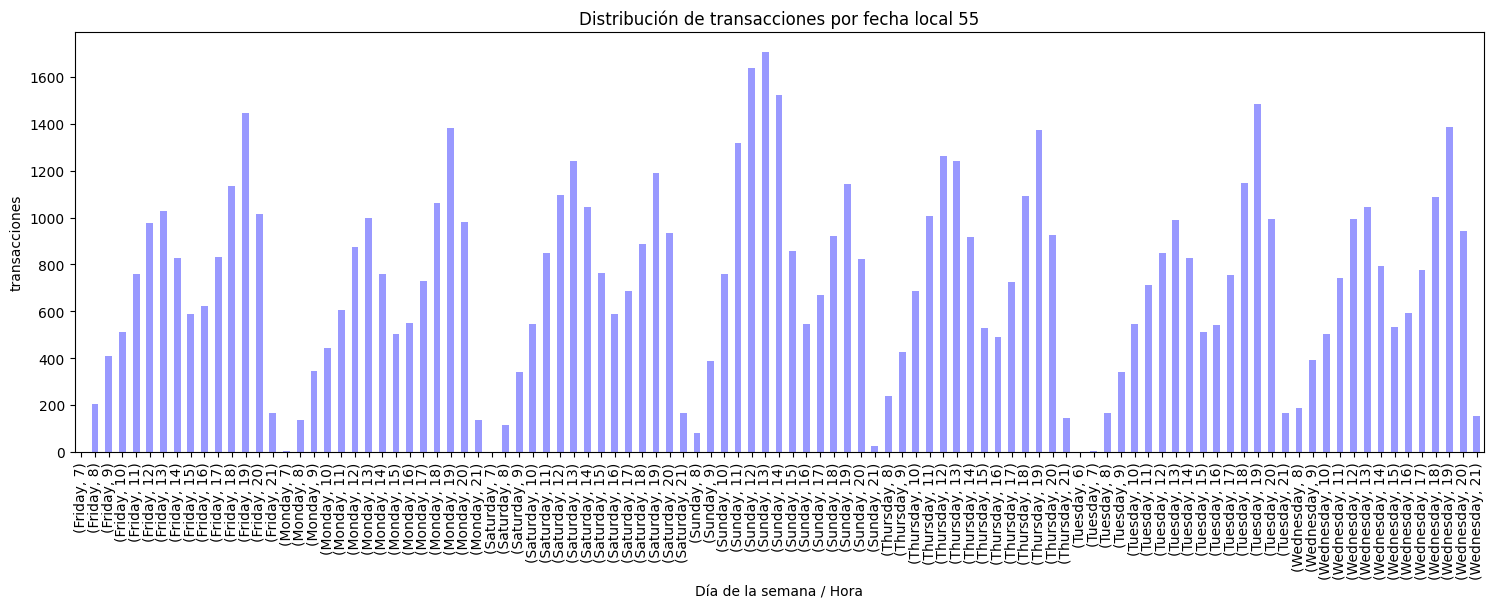

In [27]:
df_55_trx = df_55.groupby(['day_week','hour_nbr']).count()['trx_id']

fig, axs = plt.subplots(1, 1, figsize=(40, 12))
#ax.set_title('Distribución de transacciones por hora')

#Plot 1
plt.subplot(2,2,1)
df_55_trx.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='Día de la semana / Hora')
plt.title('Distribución de transacciones por fecha local 55')

Observaciones gráfico **Distribución de transacciones por dia de la semana**
* Existen 2 peak de ventas al día. El primero se registra en horario de almuerzo (13:00 / 14:00 Hrs) y el segundo se registra en la tarde (19:00 / 20:00 hrs).
* Se registra la curva mas baja a las 15:00 / 16:00 hrs
* Lunes y Domingo se genera Peak de venta en horario de Almuerzo
* Martes, miercoles, Jueves, Viernes, Sábado, Peak de venta en horario de Tarde

**Distribución de transacciones y cantidad de cajas en lineal de cajas por hora**

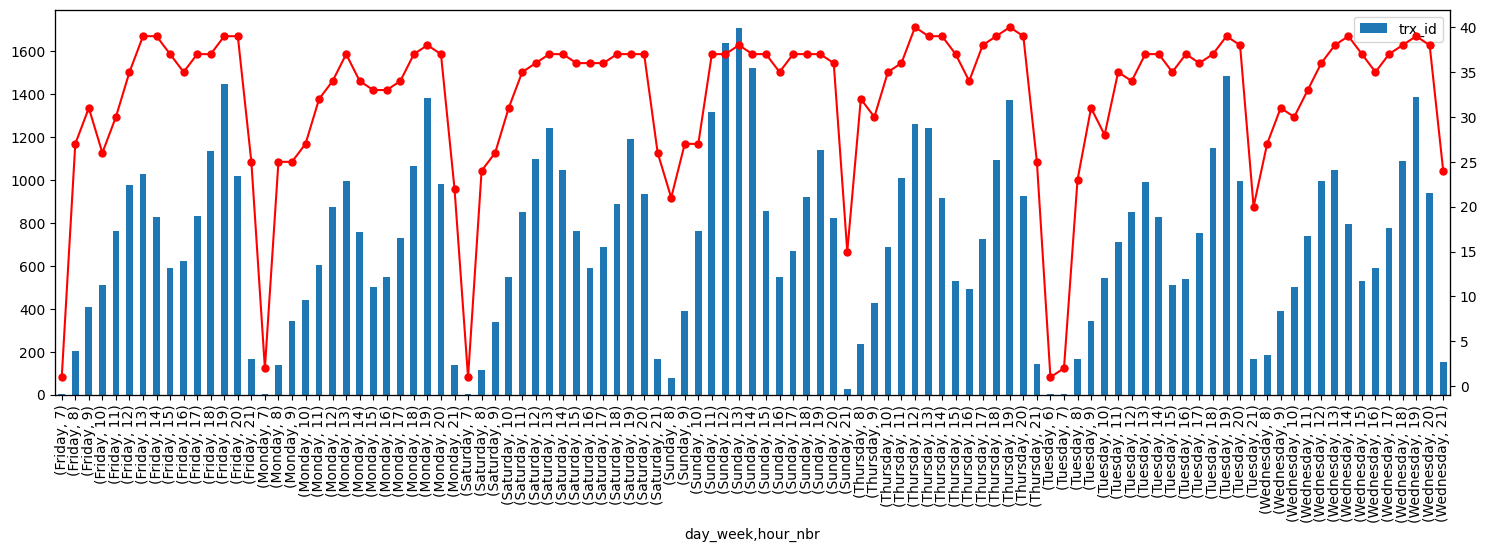

In [28]:
df_55_week1 = df_55.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_week1

df_55_week2 = df_55.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']
df_55_week2

%matplotlib inline
from matplotlib import pyplot as plt

fig0, ax0 = plt.subplots(figsize=(18, 5))
ax1 = ax0.twinx()

df_55_week1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_week2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()





In [29]:
df_55.groupby(['day_week', 'hour_nbr', 'terminal_type']).sum()['jeg_caja']

day_week   hour_nbr  terminal_type
Friday     7         POS               1
           8         POS              27
           9         POS              31
           10        POS              26
           11        POS              30
                                      ..
Wednesday  17        POS              37
           18        POS              38
           19        POS              39
           20        POS              38
           21        POS              24
Name: jeg_caja, Length: 103, dtype: int64

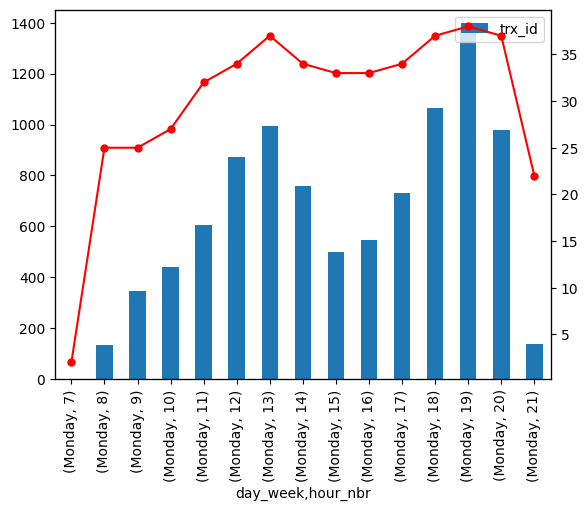

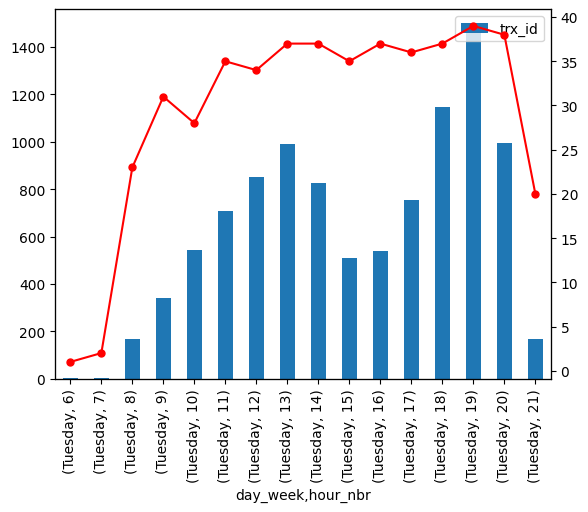

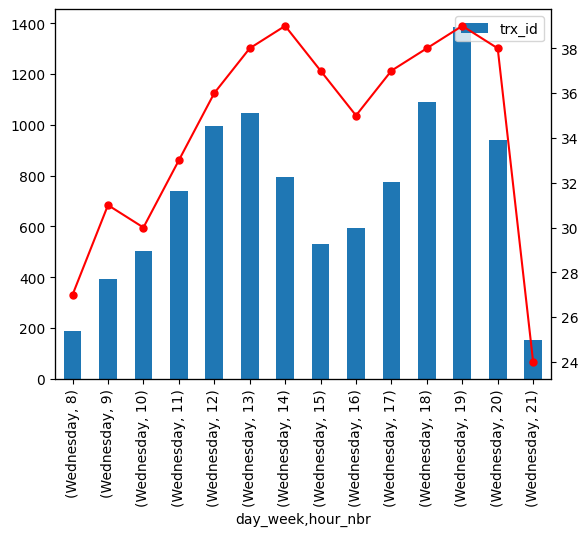

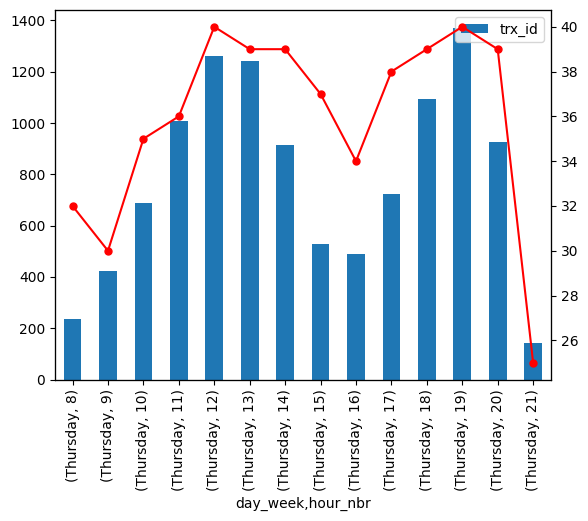

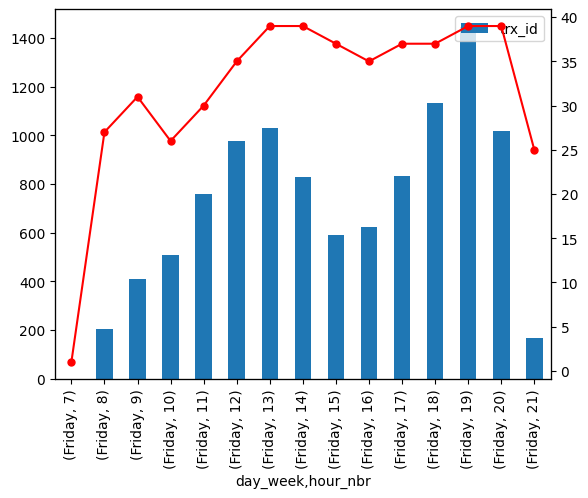

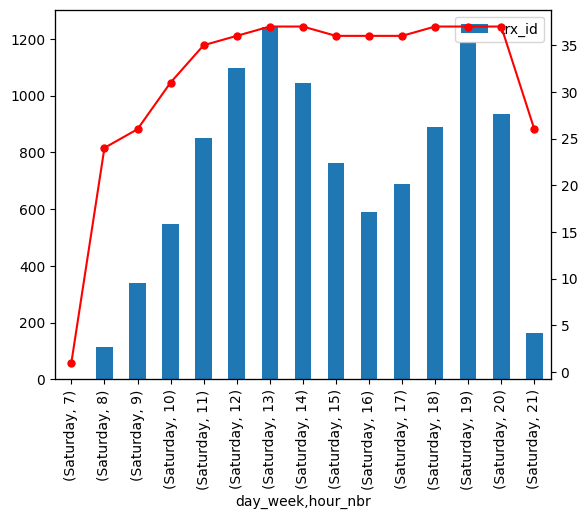

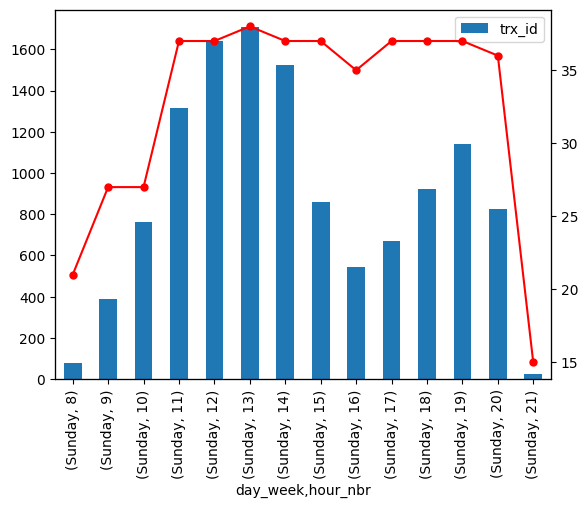

In [30]:
##Lunes
df_55_monday = df_55[(df_55["day_week"] == "Monday")]

df_55_mo_1 = df_55_monday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_mo_2 = df_55_monday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_mo_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_mo_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()



##Martes
df_55_Tuesday = df_55[(df_55["day_week"] == "Tuesday")]

df_55_tu_1 = df_55_Tuesday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_tu_2 = df_55_Tuesday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_tu_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_tu_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()



##Miercoles
df_55_Wednesday = df_55[(df_55["day_week"] == "Wednesday")]

df_55_we_1 = df_55_Wednesday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_we_2 = df_55_Wednesday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_we_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_we_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Jueves
df_55_thursday = df_55[(df_55["day_week"] == "Thursday")]

df_55_th_1 = df_55_thursday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_th_2 = df_55_thursday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_th_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_th_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Viernes
df_55_friday = df_55[(df_55["day_week"] == "Friday")]

df_55_fr_1 = df_55_friday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_fr_2 = df_55_friday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_fr_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_fr_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Sabado
df_55_saturday = df_55[(df_55["day_week"] == "Saturday")]

df_55_sa_1 = df_55_saturday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_sa_2 = df_55_saturday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_sa_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_sa_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Domingo
df_55_sunday = df_55[(df_55["day_week"] == "Sunday")]

df_55_su_1 = df_55_sunday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_su_2 = df_55_sunday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_su_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_su_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()




**Distribución de transacciones por tipo de carros**

Text(0.5, 1.0, 'Distribución de transacciones por tipo de carro')

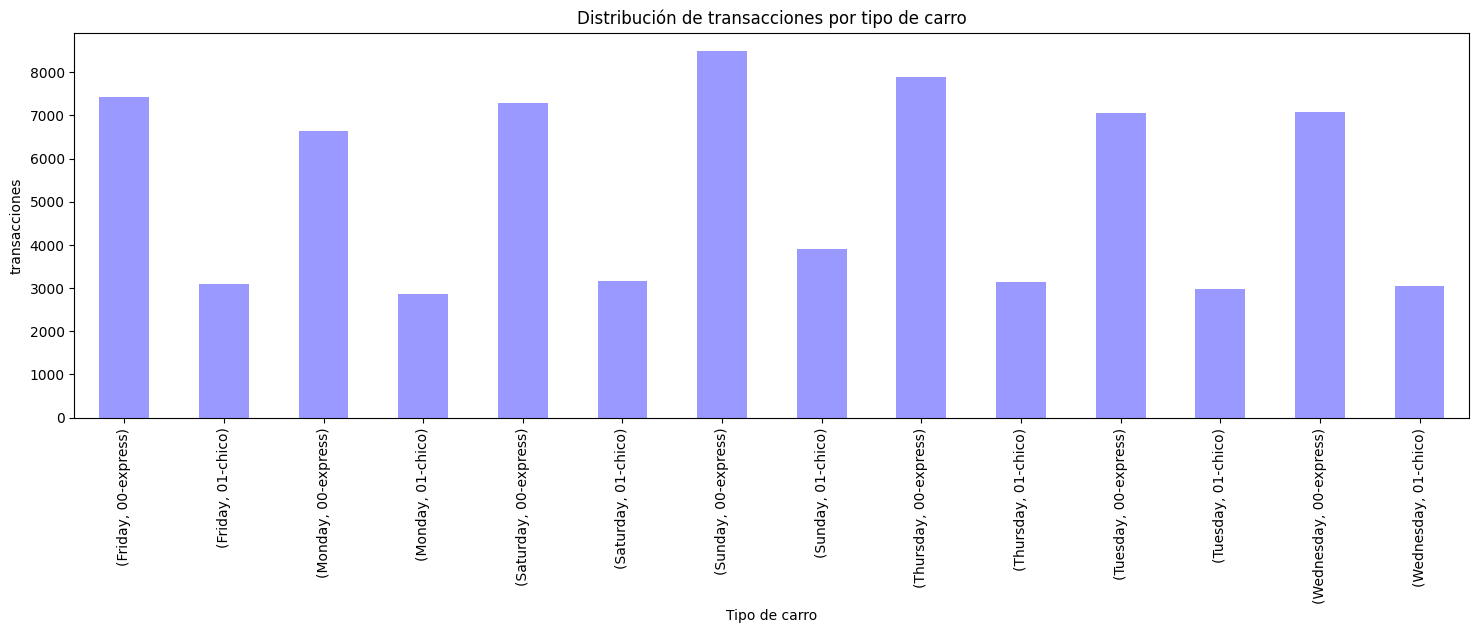

In [31]:
df_55_carros = df_55.groupby(['day_week', 'tipo_carro']).count()['trx_id']

fig, ax = plt.subplots(figsize=(18, 5))

df_55_carros.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='Tipo de carro')
plt.title('Distribución de transacciones por tipo de carro')

**media de tiempos de transacciones por tipo de carros**

In [32]:
#Tiempos Máximos por tipo de carro
val_express=1.51
val_chico=1.86
val_mediano=2.51
val_grande=3.77
val_muy_grande=5.02



df_55_time = df_55.groupby(['tipo_carro']).mean()['min_diff']
df_55_time

tipo_carro
00-express    0.853768
01-chico      1.409823
Name: min_diff, dtype: float64

#4. Modeling estimate

In [33]:
import pandas as pd
import random
import math
import numpy as np
semilla = 30

##4.1 Lectura del Dataset

In [34]:
#data_df_55_1_2_

##4.2 Estimate

*Detalle de Cajeros*

In [35]:
df_55.groupby(["terminal"]).mean()['min_diff']

terminal
1    1.006196
2    1.021360
3    1.036231
4    0.995454
Name: min_diff, dtype: float64

**Acoto la data**

In [36]:
df_55['time_between_trx'] = 0
df_55_10h = df_55

#Filtro 1 día la caja N°3
#filter1 = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05','2023-01-06', '2023-01-07', '2023-01-08'])
#filter1 = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-15', '2023-01-14', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17'])

#filter2 = df_55["terminal"].isin([3, 4, 15])
#filter3 = df_55["hour_nbr"].isin([10, 12, 13])

#df_55_10h = df_55[filter1]
#df_55_10h = df_55_[filter2]

#Filtro las 3 horas a evaluar

#filter4 = df_55["hour_nbr"].isin([12])
#filter5 = df_55["hour_nbr"].isin([13])

#df_55_10h = df_55_[filter3]
#df_55_12h = df_55[filter4]
#df_55_13h = df_55[filter5]

**Estimación de tiempos en fila**

**Obtengo el tiempo entre transacción**

In [37]:
lista=[]
hora_fin = ''
for i in range(len(df_55_10h)):
    #terminal = df_55_10h.iloc[i]['terminal']
    #print("terminal:", terminal)
    #print("Hora Ini:", hora_ini)
    #print("Hora fin:", hora_fin)
    #terminal_aux=terminal
    if i == 0:
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      #fecha = df_55_10h.iloc[i]['trx_date']
      hora_ini = df_55_10h.iloc[i]['trxhora']
      #print("i = 0")
      #print("Hora Ini:", hora_ini)
      hora_fin=hora_ini
      #print("Hora fin:", hora_fin)
      result = hora_ini-hora_fin
      #print("Diff:", result)
      #print("hora_hora:", hora)
      #terminal_aux=terminal
    else:
      terminal_aux=terminal
      hour_aux=hour
      #fecha_aux=fecha
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      #fecha = df_55_10h.iloc[i]['trx_date']
      #print("Terminal_aux:", terminal_aux)
      #print("Terminal:", terminal)
      #print("Fecha:", fecha)
      #print("Fecha_aux:", fecha_aux)
      if terminal==terminal_aux:
        if hour==hour_aux:
          hora_fin = df_55_10h.iloc[i]['trxhora']
          #print("i > 1")
          #print("Hora Ini:", hora_ini)
          result = hora_fin-hora_ini
          hora_ini=hora_fin
          #print("Hora fin:", hora_fin)
          #print("Diff:", result)
        else:
          #print("Las horas no son iguales")
          hora_ini = df_55_10h.iloc[i]['trxhora']
      if terminal!=terminal_aux:
        #print("Los terminal no son iguales")
        hora_ini = df_55_10h.iloc[i]['trxhora']
    lista.append(result)

#print(lista)

#for i in range(len(df_55_10h)):
df_55_10h['time_between_trx'] = lista

In [38]:
df_55_10h

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,jeg_caja,day_week,time_between_trx
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,229230102001000439,1.0,30.0,6.0,37.0,0.616667,00-express,1,Monday,0
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,229230102001000540,30.0,36.0,15.0,81.0,1.350000,01-chico,0,Monday,1
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,229230102001000641,10.0,19.0,11.0,40.0,0.666667,00-express,0,Monday,1
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,229230102001000742,5.0,22.0,13.0,40.0,0.666667,00-express,0,Monday,1
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,229230102001000843,61.0,36.0,11.0,108.0,1.800000,00-express,0,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74414,2023-03-31,229,19,1958,3,POS,200 EXPRESS 400,MACUL,46.39,64260,229230331003030358,58.0,38.5,16.0,112.5,1.875000,01-chico,0,Friday,2
75040,2023-03-31,229,20,2002,3,POS,200 EXPRESS 400,MACUL,2.00,2100,229230331003030402,4.0,18.0,16.0,38.0,0.633333,00-express,1,Friday,2
75642,2023-03-31,229,20,2003,3,POS,200 EXPRESS 400,MACUL,2.00,3983,229230331003030503,14.0,33.0,16.0,63.0,1.050000,00-express,0,Friday,1
74866,2023-03-31,229,20,2004,3,POS,200 EXPRESS 400,MACUL,4.00,3361,229230331003030604,13.0,35.0,4.0,52.0,0.866667,00-express,0,Friday,1


##4.3 **Genero estimación del tiempo de llegada**

In [39]:

df_55_10h['mean_time_between_trx'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_between_trx.transform(np.mean)


In [40]:
df_55_10h.head(30)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,...,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,jeg_caja,day_week,time_between_trx,mean_time_between_trx
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,...,1.0,30.0,6.0,37.0,0.616667,00-express,1,Monday,0,0.875000
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,...,30.0,36.0,15.0,81.0,1.350000,01-chico,0,Monday,1,0.875000
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,...,10.0,19.0,11.0,40.0,0.666667,00-express,0,Monday,1,0.875000
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,...,5.0,22.0,13.0,40.0,0.666667,00-express,0,Monday,1,0.875000
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,...,61.0,36.0,11.0,108.0,1.800000,00-express,0,Monday,1,0.875000
2827,2023-01-02,229,11,1144,1,POS,200 EXPRESS 400,MACUL,6.00,8344,...,18.0,26.0,6.0,50.0,0.833333,00-express,0,Monday,1,0.875000
2812,2023-01-02,229,11,1145,1,POS,200 EXPRESS 400,MACUL,7.00,9018,...,13.0,20.0,6.0,39.0,0.650000,00-express,0,Monday,1,0.875000
3697,2023-01-02,229,11,1146,1,POS,200 EXPRESS 400,MACUL,6.00,7813,...,18.0,23.0,8.0,49.0,0.816667,00-express,0,Monday,1,0.875000
3730,2023-01-02,229,12,1218,1,POS,200 EXPRESS 400,MACUL,5.00,5445,...,8.0,22.0,8.0,38.0,0.633333,00-express,1,Monday,1,1.809524
5683,2023-01-02,229,12,1219,1,POS,200 EXPRESS 400,MACUL,8.00,9033,...,18.0,33.0,15.0,66.0,1.100000,00-express,0,Monday,1,1.809524


In [41]:
random.seed (semilla)


df_55_10h['time_arrival'] = 0

lista=[]
log_fin = 0

##IDENTIFICAR Solo el conjunto de datos que debo hacer la media.
##Terminal, y Hora
##Similar a la solución anterior.

for i in range(len(df_55_10h)):

  if i == 0:
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      mean = df_55_10h.iloc[i]['mean_time_between_trx']
      #print(mean)
      r = random.random()
      log_ini = (math.log(r) * -(mean)) + log_fin
      log_fin = log_ini
      #print(log_ini)
      #lista.append(log_ini)
  else:
    terminal_aux=terminal
    hour_aux=hour
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    if terminal==terminal_aux:
      if hour==hour_aux:
        #mean = df_55_10h['time_between_trx'].mean() ## Dereepente una especie de partition BY de SQL en Python me viene bien.
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        #print(mean)
        r = random.random()
        log_ini = (math.log(r) * -(mean)) + log_fin
        log_fin = log_ini
        #print("Hora",hour_aux)
        #print("Hora",hour)
        #print(log_ini)
      if hour!=hour_aux:
        #print("Las horas no son iguales")
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        r = random.random()
        log_fin = 0
        log_ini = (math.log(r) * -(mean)) + log_fin
    if terminal!=terminal_aux:
        #print("Los terminal no son iguales")
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        r = random.random()
        log_fin = 0
        log_ini = (math.log(r) * -(mean)) + log_fin
  lista.append(log_ini)

#for i in range(len(df_55_10h)):
df_55_10h['time_arrival'] = lista

In [42]:
df_55_10h.head(20)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,...,tender_time,inactive_time,time_total,min_diff,tipo_carro,jeg_caja,day_week,time_between_trx,mean_time_between_trx,time_arrival
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,...,30.0,6.0,37.0,0.616667,00-express,1,Monday,0,0.875000,0.540652
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,...,36.0,15.0,81.0,1.350000,01-chico,0,Monday,1,0.875000,1.626220
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,...,19.0,11.0,40.0,0.666667,00-express,0,Monday,1,0.875000,4.693383
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,...,22.0,13.0,40.0,0.666667,00-express,0,Monday,1,0.875000,5.065437
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,...,36.0,11.0,108.0,1.800000,00-express,0,Monday,1,0.875000,6.430968
2827,2023-01-02,229,11,1144,1,POS,200 EXPRESS 400,MACUL,6.00,8344,...,26.0,6.0,50.0,0.833333,00-express,0,Monday,1,0.875000,7.618869
2812,2023-01-02,229,11,1145,1,POS,200 EXPRESS 400,MACUL,7.00,9018,...,20.0,6.0,39.0,0.650000,00-express,0,Monday,1,0.875000,8.426774
3697,2023-01-02,229,11,1146,1,POS,200 EXPRESS 400,MACUL,6.00,7813,...,23.0,8.0,49.0,0.816667,00-express,0,Monday,1,0.875000,8.815120
3730,2023-01-02,229,12,1218,1,POS,200 EXPRESS 400,MACUL,5.00,5445,...,22.0,8.0,38.0,0.633333,00-express,1,Monday,1,1.809524,0.020360
5683,2023-01-02,229,12,1219,1,POS,200 EXPRESS 400,MACUL,8.00,9033,...,33.0,15.0,66.0,1.100000,00-express,0,Monday,1,1.809524,1.399127


**Genero estimación de tiempo de servicio**

In [43]:
df_55_10h['min_service'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).min_diff.transform(np.min)
df_55_10h['max_service'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).min_diff.transform(np.max)

In [44]:
df_55_10h['time_service'] = 0

lista=[]

for i in range(len(df_55_10h)):
  r = random.random()
  #print(numero)
  #min = df_55_10h['min_diff'].min()
  min = df_55_10h.iloc[i]['min_service']
  #max = df_55_10h['min_diff'].max()
  max = df_55_10h.iloc[i]['max_service']
  #print(min)
  #print(max)
  time = (min+(max-min)) * r
  #print('the time service is:', time)
  lista.append(time)

#for i in range(len(df_55_10h)):
df_55_10h['time_service'] = lista

**Genero estimación de tiempo espera**

In [45]:
df_55_10h['time_exit'] = 0
df_55_10h['time_waiting'] = 0
lista1=[]
lista2=[]

for i in range(len(df_55_10h)):
  if i == 0:
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
    #print('llegada', tiempo_llegada)
    tiempo_servicio = df_55_10h.iloc[i]['time_service']
    #print('servicio', tiempo_servicio)
    tiempo_espera = 0
    #print('espera', tiempo_espera)
    tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
    #print('salida',tiempo_salida)
  if i > 0:
    terminal_aux=terminal
    hour_aux=hour
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    if terminal==terminal_aux:
      if hour==hour_aux:
        #print('Fila >1')
        tiempo_salida_ant=tiempo_salida
        #print('Salida', tiempo_salida_ant)
        tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
        #print('llegada', tiempo_llegada)
        tiempo_servicio = df_55_10h.iloc[i]['time_service']
        #print('servicio', tiempo_servicio)
        tiempo_espera = tiempo_salida_ant - tiempo_llegada
        #print('espera', tiempo_espera)
        tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
        #print('salida',tiempo_salida)
      if hour!=hour_aux:
        tiempo_salida_ant=tiempo_salida
        #print('Salida', tiempo_salida_ant)
        tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
        #print('llegada', tiempo_llegada)
        tiempo_servicio = df_55_10h.iloc[i]['time_service']
        #print('servicio', tiempo_servicio)
        #print('Hora distinta')
        tiempo_espera = 0
        tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
    if terminal!=terminal_aux:
      tiempo_salida_ant=tiempo_salida
      #print('Salida', tiempo_salida_ant)
      tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
      #print('llegada', tiempo_llegada)
      tiempo_servicio = df_55_10h.iloc[i]['time_service']
      #print('servicio', tiempo_servicio)
      #print('Hora distinta')
      tiempo_espera = 0
      tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
  lista1.append(tiempo_espera)
  lista2.append(tiempo_salida)

#for i in range(len(df_55_10h)):
df_55_10h['time_exit'] = lista2
df_55_10h['time_waiting'] = lista1



**Calculos finales de estimación de cola y tiempo promedio**

In [46]:
df_55_10h['sum_waiting'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_waiting.transform(np.sum)
df_55_10h['max_exit'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_exit.transform(np.max)
df_55_10h['count_'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_waiting.transform(len)
df_55_10h['estimacion_fila'] = df_55_10h['sum_waiting'] / df_55_10h['max_exit']
df_55_10h['estimacion_tiempo_espera'] = df_55_10h['sum_waiting'] / df_55_10h['count_']


Creo variable Nivel de tiempo en caja, Si supera el tiempo establecido máximo para Lider, =1, sino lo supera =0.

In [47]:
##var_def=7.62
var_def=3.32

df_55_10h['NTC_A'] = 0
df_55_10h['estimacion_fila_corre'] = 0
df_55_10h['estimacion_tiempo_corre'] = 0

lista1=[]
lista2=[]
lista3=[]
for i in range(len(df_55_10h)):
  if i >= 0:
      estimacion_tiempo_espera = df_55_10h.iloc[i]['estimacion_tiempo_espera']
      estimacion_fila = df_55_10h.iloc[i]['estimacion_fila']
      if estimacion_tiempo_espera > var_def:
          var=1
      else:
          var=0

      if estimacion_fila < 0:
        corre_1 = 0
      else:
        corre_1= estimacion_fila

      if estimacion_tiempo_espera < 0:
        corre_2 = 0
      else:
        corre_2= estimacion_tiempo_espera

  lista1.append(var)
  lista2.append(corre_1)
  lista3.append(corre_2)


#for i in range(len(df_55_10h)):
df_55_10h['NTC_A'] = lista1
df_55_10h['estimacion_fila_corre'] = lista2
df_55_10h['estimacion_tiempo_corre'] = lista3


In [48]:
df_55_10h.head()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,...,time_exit,time_waiting,sum_waiting,max_exit,count_,estimacion_fila,estimacion_tiempo_espera,NTC_A,estimacion_fila_corre,estimacion_tiempo_corre
2815,2023-01-02,229,11,1139,1,POS,200 EXPRESS 400,MACUL,1.00,2714,...,1.716712,0.000000,-9.543386,8.847064,8,-1.078707,-1.192923,0,0.0,0.0
5386,2023-01-02,229,11,1140,1,POS,200 EXPRESS 400,MACUL,20.00,6865,...,2.867799,0.090491,-9.543386,8.847064,8,-1.078707,-1.192923,0,0.0,0.0
4741,2023-01-02,229,11,1141,1,POS,200 EXPRESS 400,MACUL,7.38,4232,...,2.967860,-1.825583,-9.543386,8.847064,8,-1.078707,-1.192923,0,0.0,0.0
4861,2023-01-02,229,11,1142,1,POS,200 EXPRESS 400,MACUL,3.00,1488,...,4.536541,-2.097577,-9.543386,8.847064,8,-1.078707,-1.192923,0,0.0,0.0
4705,2023-01-02,229,11,1143,1,POS,200 EXPRESS 400,MACUL,1.00,1840,...,5.822140,-1.894426,-9.543386,8.847064,8,-1.078707,-1.192923,0,0.0,0.0


In [49]:
df_55_10h.to_csv('data_df_229_1_2_3_4.csv', index = False)

##4.4 Lectura Dataset procesado 2

In [50]:
#df_55_10h.to_csv('data_df_55_1_2_3_4.csv', index = False)

#5. Modeling Regression

##Librerias

In [51]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Lineal Regression
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Decision Tree Regressor

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##Lectura de datos

In [52]:
#data_df_55_1_2_3_4

##correlación

In [53]:
df= df_55_10h

In [54]:
df.columns

Index(['trx_date', 'store_nbr', 'hour_nbr', 'trxhora', 'terminal',
       'terminal_type', 'formato', 'comuna', 'sales_unit_qty',
       'sales_retail_amt', 'trx_id', 'scan_time', 'tender_time',
       'inactive_time', 'time_total', 'min_diff', 'tipo_carro', 'jeg_caja',
       'day_week', 'time_between_trx', 'mean_time_between_trx', 'time_arrival',
       'min_service', 'max_service', 'time_service', 'time_exit',
       'time_waiting', 'sum_waiting', 'max_exit', 'count_', 'estimacion_fila',
       'estimacion_tiempo_espera', 'NTC_A', 'estimacion_fila_corre',
       'estimacion_tiempo_corre'],
      dtype='object')

In [55]:
corr = df[['hour_nbr', 'terminal', 'sales_unit_qty', 'sales_retail_amt', 'scan_time', 'tender_time',
'inactive_time', 'time_total', 'jeg_caja', 'time_between_trx', 'time_arrival',
'time_service', 'time_exit', 'time_waiting', 'NTC_A', 'estimacion_fila_corre', 'estimacion_tiempo_corre']]

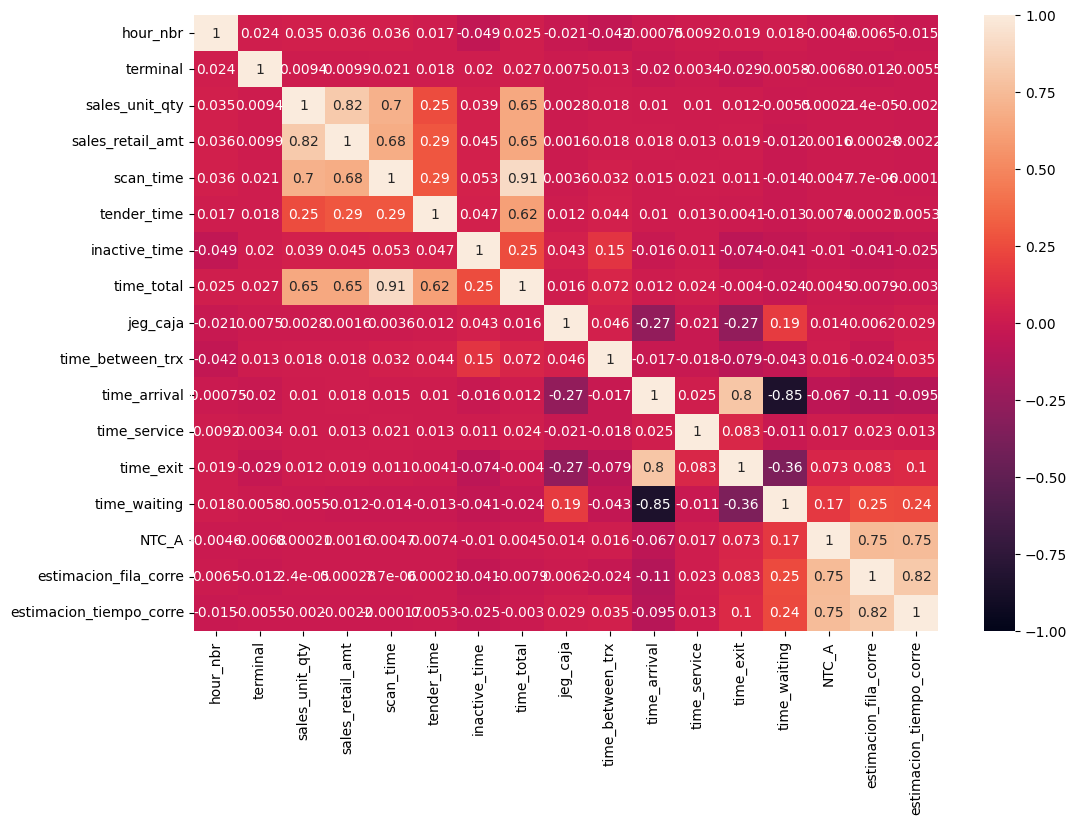

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr.corr(), annot=True, vmin=-1, vmax=1);

In [57]:
corr_test = pearsonr(x = corr['sales_unit_qty'], y =  corr['time_total'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6542055688984771
P-value:  0.0


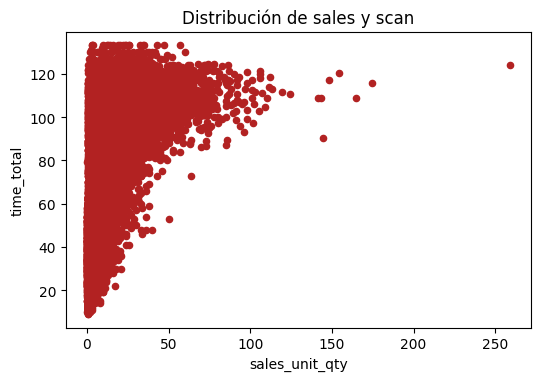

In [58]:
fig, ax = plt.subplots(figsize=(6, 3.84))

corr.plot(
    x    = 'sales_unit_qty',
    y    = 'time_total',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de sales y scan');

##implementación regresión Lineal

**Separación de los datos**

In [249]:
X = corr[['sales_unit_qty', 'time_total', 'hour_nbr', 'time_service', 'NTC_A', 'estimacion_tiempo_corre']]
y = corr['estimacion_fila_corre']

In [250]:
# División de los datos en train y test
# ==============================================================================

labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [258]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    24443.000000
mean         0.128397
std          0.605612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.886239
Name: estimacion_fila_corre, dtype: float64


In [259]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    49627.000000
mean         0.129888
std          0.610186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.886239
Name: estimacion_fila_corre, dtype: float64


In [251]:
y_test.head(20)

17239    0.000000
7498     0.000000
55696    0.000000
43114    0.000000
7585     0.000000
40531    0.000000
38461    0.000000
70578    0.000000
75862    0.000000
33052    0.000000
40468    0.000000
53821    0.810872
51007    0.000000
63718    0.000000
27481    0.000000
59896    0.000000
22858    3.178563
21283    0.000000
26449    0.000000
46918    0.000000
Name: estimacion_fila_corre, dtype: float64

**Implementación Modelo**

In [252]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.7198207272079209

In [253]:
y_pred_lineal = modelo.predict(X_test)

In [254]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_lineal.squeeze()})
print(df_preds)

       Actual  Predicted
17239     0.0   0.044501
7498      0.0   0.046683
55696     0.0   0.028486
43114     0.0   0.050004
7585      0.0   0.041014
...       ...        ...
7225      0.0   0.019742
18679     0.0   0.042115
50494     0.0   0.033798
14134     0.0   0.017285
48298     0.0   0.063833

[49627 rows x 2 columns]


In [255]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lineal)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 0.10


In [256]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_lineal)

0.7198207272079209

In [257]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = y_pred_lineal,
        squared = False
       )
rmse

0.3229802210721337

##Implementación regresión Lineal multiple OLS

**Separación de los datos**

In [67]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

**Implementación modelo**

In [68]:
##Ordinary Least Squares
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                              OLS Regression Results                             
Dep. Variable:     estimacion_fila_corre   R-squared:                       0.693
Model:                               OLS   Adj. R-squared:                  0.693
Method:                    Least Squares   F-statistic:                     9188.
Date:                   Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                           00:58:16   Log-Likelihood:                -7996.3
No. Observations:                  24443   AIC:                         1.601e+04
Df Residuals:                      24436   BIC:                         1.606e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

##Implementación Decision Tree Regressor


**Separción de los datos**

In [261]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [262]:
X_test

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre
17239,20.00,103.0,18,0.706862,0,0.0
7498,1.00,31.0,17,0.639288,0,0.0
55696,4.00,50.0,14,0.230635,0,0.0
43114,4.00,58.0,16,1.335757,0,0.0
7585,6.00,62.0,18,0.387761,0,0.0
...,...,...,...,...,...,...
7225,2.00,44.0,11,0.219264,0,0.0
18679,3.00,42.0,14,1.000461,0,0.0
50494,13.57,73.0,12,0.924105,0,0.0
14134,7.00,77.0,12,0.200277,0,0.0


**Implementación del modelo**

In [263]:
from sklearn.tree import DecisionTreeRegressor

In [264]:
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.9908784468767315

In [265]:
y_pred_dtr = modelo.predict(X_test)

In [266]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_dtr.squeeze()})
df_preds.head()

,Actual,Predicted
17239,0.0,0.0
7498,0.0,0.0
55696,0.0,0.0
43114,0.0,0.0
7585,0.0,0.0


In [267]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_dtr)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 0.00


In [268]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_dtr)

0.9908784468767315

In [269]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = y_pred_dtr,
        squared = False
       )
rmse

0.058276347119097266

##Implementación SGD Regressor

In [77]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [78]:
from sklearn.linear_model import SGDRegressor

In [79]:
modelo = SGDRegressor(random_state=10, learning_rate='invscaling', max_iter=1000)
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.629244263819688

In [80]:
y_pred_sgd = modelo.predict(X_test)

In [81]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_sgd.squeeze()})
print(df_preds)

       Actual  Predicted
17239     0.0  -0.032567
7498      0.0   0.024704
55696     0.0  -0.010762
43114     0.0  -0.005106
7585      0.0  -0.010747
...       ...        ...
7225      0.0  -0.015848
18679     0.0   0.008082
50494     0.0  -0.017991
14134     0.0  -0.051858
48298     0.0   0.012804

[49627 rows x 2 columns]


In [82]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_sgd)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 0.10


In [83]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_sgd)

0.629244263819688

##Implementación Modelo Dummy

In [84]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor()

dummy_reg.fit(X_train, y_train)
dummy_reg.score(X_test, y_test)


-5.967716765864495e-06

In [85]:
y_pred_dummy = dummy_reg.predict(X_test)
y_pred_dummy

array([0.12839722, 0.12839722, 0.12839722, ..., 0.12839722, 0.12839722,
       0.12839722])

In [86]:
df_preds_dummy = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_dummy.squeeze()})
print(df_preds_dummy)

       Actual  Predicted
17239     0.0   0.128397
7498      0.0   0.128397
55696     0.0   0.128397
43114     0.0   0.128397
7585      0.0   0.128397
...       ...        ...
7225      0.0   0.128397
18679     0.0   0.128397
50494     0.0   0.128397
14134     0.0   0.128397
48298     0.0   0.128397

[49627 rows x 2 columns]


In [87]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print(f'Mean absolute error: {mae_dummy:.2f}')

Mean absolute error: 0.24


In [88]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_dummy)

-5.967716765864495e-06

##Validación

In [271]:
# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
            )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-0.09194949 -0.10072954 -0.06852247 -0.07669171 -0.10497349]
Média métricas de validación cruzada: -0.08857334077408476


In [272]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.081175,0.016194,0.978819,1.0,-0.087330,-4.325189e-17
1,0.078834,0.004152,0.980208,1.0,-0.087423,-4.300068e-17
2,0.054732,0.007305,0.980650,1.0,-0.082764,-5.550857e-17
3,0.042685,0.003683,0.985386,1.0,-0.073208,-4.546330e-17
4,0.041578,0.003492,0.978650,1.0,-0.088767,-4.933633e-17
5,0.042393,0.003735,0.972043,1.0,-0.100938,-3.869304e-17
6,0.044926,0.003514,0.937765,1.0,-0.152411,-4.724594e-17
7,0.045042,0.003828,0.981637,1.0,-0.081333,-3.855799e-17
8,0.043262,0.003654,0.969836,1.0,-0.105181,-5.121697e-17
9,0.046500,0.003651,0.986313,1.0,-0.072488,-3.826136e-17


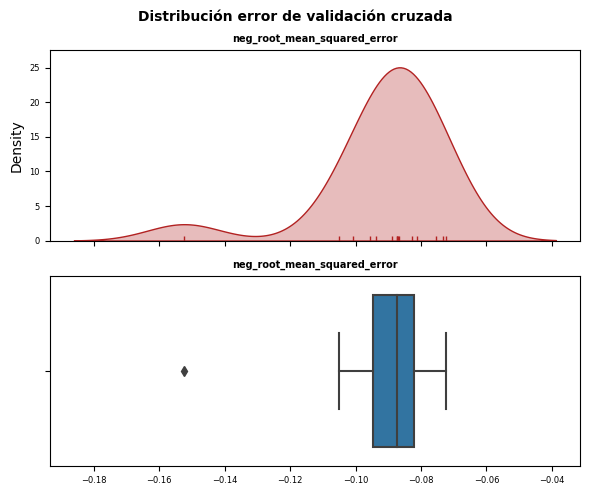

In [273]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.kdeplot(
    cv_scores['test_neg_root_mean_squared_error'],
    fill    = True,
    alpha   = 0.3,
    color   = "firebrick",
    ax      = axes[0]
)
sns.rugplot(
    cv_scores['test_neg_root_mean_squared_error'],
    color   = "firebrick",
    ax      = axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")

sns.boxplot(
    x  = cv_scores['test_neg_root_mean_squared_error'],
    ax = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

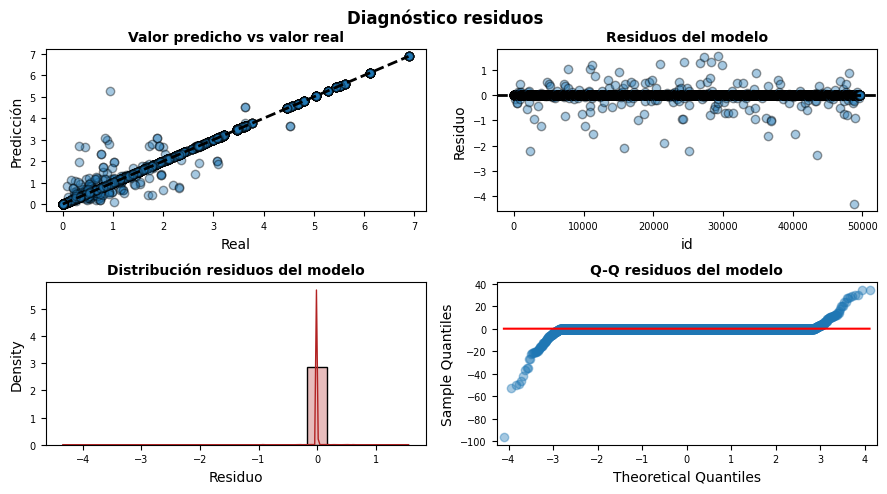

In [220]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = modelo,
                    X         = X_test,
                    y         = y_test,
                    cv        = cv
                 )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_test, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'k--', color = 'black', lw=2
)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), y_test - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_test - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_test - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

##Visualización Predicciones

In [187]:
df_predicho = X_test

In [188]:
df_predicho

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre
17239,20.00,103.0,18,0.706862,0,0.0
7498,1.00,31.0,17,0.639288,0,0.0
55696,4.00,50.0,14,0.230635,0,0.0
43114,4.00,58.0,16,1.335757,0,0.0
7585,6.00,62.0,18,0.387761,0,0.0
...,...,...,...,...,...,...
7225,2.00,44.0,11,0.219264,0,0.0
18679,3.00,42.0,14,1.000461,0,0.0
50494,13.57,73.0,12,0.924105,0,0.0
14134,7.00,77.0,12,0.200277,0,0.0


In [189]:
y_test

17239    0.0
7498     0.0
55696    0.0
43114    0.0
7585     0.0
        ... 
7225     0.0
18679    0.0
50494    0.0
14134    0.0
48298    0.0
Name: estimacion_fila_corre, Length: 49627, dtype: float64

In [190]:
#for i in range(len(df_predicho)):
df_predicho['y_test'] = y_test

In [191]:
#for i in range(len(df_predicho)):
df_predicho['y_pred_dtr'] = y_pred_dtr

In [274]:
df_predicho

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_dtr,fallo
17239,20.00,103.0,18,0.706862,0,0.0,0.0,0.0,0.0
7498,1.00,31.0,17,0.639288,0,0.0,0.0,0.0,0.0
55696,4.00,50.0,14,0.230635,0,0.0,0.0,0.0,0.0
43114,4.00,58.0,16,1.335757,0,0.0,0.0,0.0,0.0
7585,6.00,62.0,18,0.387761,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7225,2.00,44.0,11,0.219264,0,0.0,0.0,0.0,0.0
18679,3.00,42.0,14,1.000461,0,0.0,0.0,0.0,0.0
50494,13.57,73.0,12,0.924105,0,0.0,0.0,0.0,0.0
14134,7.00,77.0,12,0.200277,0,0.0,0.0,0.0,0.0


**Filtro de predicciones**

In [193]:
df_predicho[(df_predicho["y_test"] >= 1)]

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_dtr
22858,2.00,26.0,18,0.861385,1,3.581774,3.178563,3.178563
26071,7.35,106.0,16,1.273215,0,2.256240,1.396442,1.603796
38344,6.00,62.0,14,0.109585,0,3.298202,2.463825,2.463825
26191,3.00,76.0,19,0.810118,0,1.707370,1.880534,1.880534
48898,1.00,12.0,14,0.253537,0,1.087838,1.243107,1.243107
...,...,...,...,...,...,...,...,...
14479,33.33,109.8,11,1.179461,1,3.322479,2.311312,2.311312
5419,9.71,83.0,13,1.373973,0,1.957420,1.939147,1.939147
55858,4.00,60.0,11,0.518043,0,3.066380,3.463073,3.463073
1123,7.00,31.0,12,1.111695,0,1.067569,1.024774,1.024774


**Distribución de predicciones**

(array([4.7061e+04, 7.0500e+02, 5.3200e+02, 4.5900e+02, 3.6300e+02,
        1.9600e+02, 1.3500e+02, 7.9000e+01, 8.5000e+01, 1.2000e+01]),
 array([0.        , 0.68862388, 1.37724775, 2.06587163, 2.7544955 ,
        3.44311938, 4.13174325, 4.82036713, 5.508991  , 6.19761488,
        6.88623875]),
 <BarContainer object of 10 artists>)

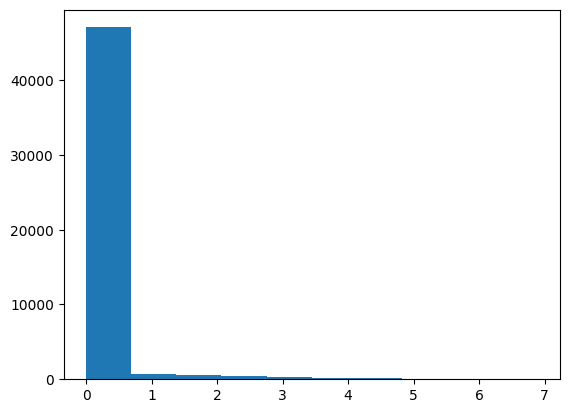

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(4)

# Simulación de datos
x = df_predicho["y_pred_dtr"]

# Histograma
fig, ax = plt.subplots()
ax.hist(x)
##plt.show()

**Fallo del modelo**

In [194]:
df_predicho['fallo'] = 0
df_predicho['fallo'] = df_predicho['y_test'] - df_predicho['y_pred_dtr']

In [198]:
df_predicho.shape

(49627, 9)

In [201]:
df_predicho[(df_predicho['y_test'] != 0)]

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_dtr,fallo
53821,13.00,69.0,13,0.365234,0,0.803460,0.810872,0.810872,0.000000e+00
22858,2.00,26.0,18,0.861385,1,3.581774,3.178563,3.178563,0.000000e+00
26071,7.35,106.0,16,1.273215,0,2.256240,1.396442,1.603796,-2.073538e-01
38344,6.00,62.0,14,0.109585,0,3.298202,2.463825,2.463825,0.000000e+00
1963,3.00,42.0,11,1.203869,0,0.359612,0.339758,0.339758,-5.551115e-17
...,...,...,...,...,...,...,...,...,...
47578,1.00,45.0,9,1.336934,0,0.385431,0.270474,0.363257,-9.278316e-02
57580,15.00,60.0,17,1.411842,0,0.315249,0.333619,0.333619,0.000000e+00
65540,4.00,53.0,9,1.299290,0,0.931461,0.859897,0.859897,0.000000e+00
1123,7.00,31.0,12,1.111695,0,1.067569,1.024774,1.024774,-2.220446e-16




*   49627 = Predicciones
*   1414 = Predicciones distintas de cero
*   46079 = No hay fila
*   3.548 = Hay fila






In [ ]:
no_aceptables = fallo[(fallo['fallo'] != 0)]
#fallo.sort_values('fallo')

#15.439 Predicciones "Aceptables"
#563 Predicciones "No Aceptables"
#4% con errores

no_aceptables

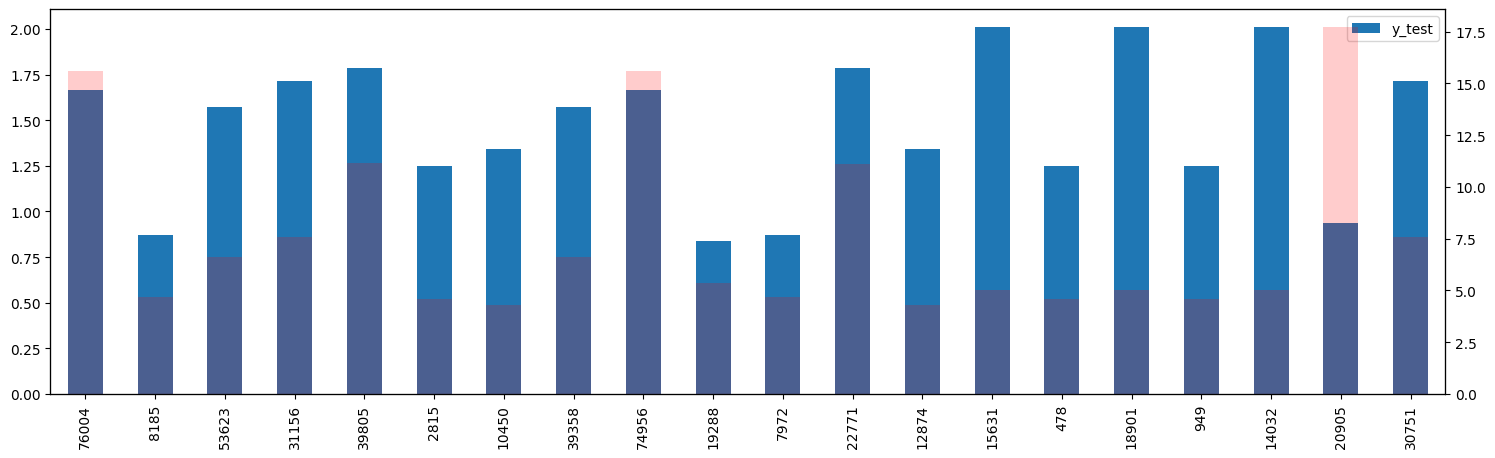

In [97]:
x1 = no_aceptables['y_test']
x2 = no_aceptables['fallo']*-1


%matplotlib inline
from matplotlib import pyplot as plt

fig0, ax0 = plt.subplots(figsize=(18, 5))
ax1 = ax0.twinx()

x1.plot(kind='bar', stacked=True, ax=ax0, label='y_test')
ax0.legend(loc ="upper left")
x2.plot(kind='bar', color="red", ax=ax1, secondary_y=True, label='fallo', alpha=0.2)
ax0.legend(loc ="upper right")
plt.show()





**Documentación**

1. **Error absoluto medio (MAE)**: Cuando restamos los valores predichos de los valores reales, obteniendo los errores, sumamos los valores absolutos de esos errores y obtenemos su media. Esta métrica da una noción del error global para cada predicción del modelo, cuanto menor (más cercano a 0) mejor.

2. **R2_Score**: El coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos.

[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).